LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

**Our Goal:**
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

## Importing libraries, loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


# Exploratory Data Analysis

**Count plot of loan status**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

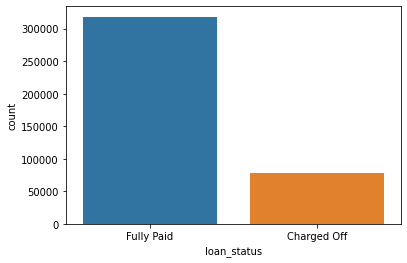

In [9]:
sns.countplot(x="loan_status", data=df)

**Histogram of the loan amount**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

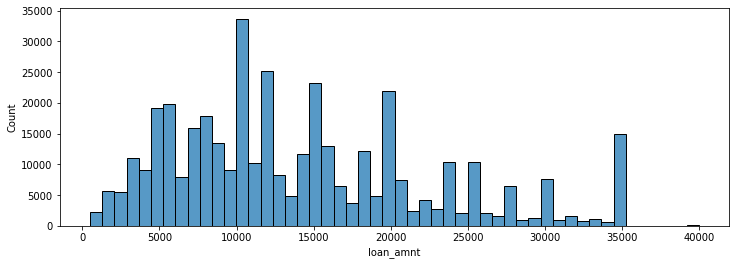

In [10]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], bins=50)

In [11]:
df['loan_amnt'].max()

40000.0

In [12]:
df[df['loan_amnt']==40000].count()[0]

180

**Correlation between the continuous feature variables**

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

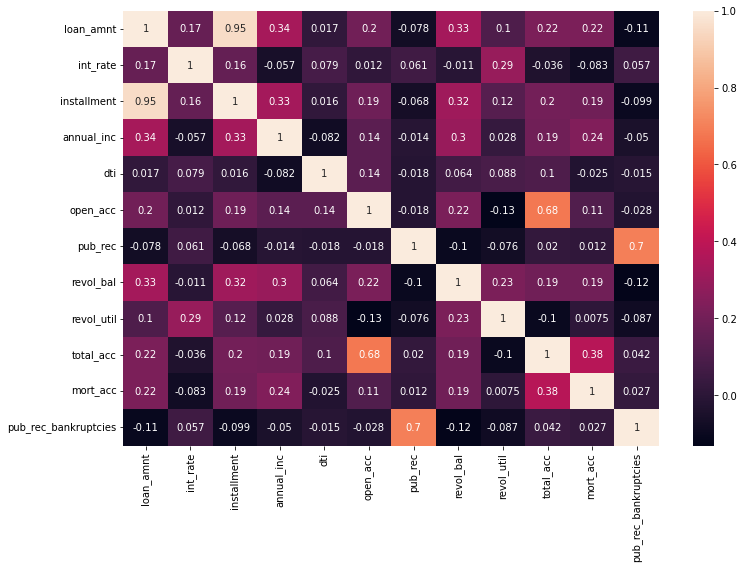

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

**There's high correlation with the "installment" feature. Exploring this feature more**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

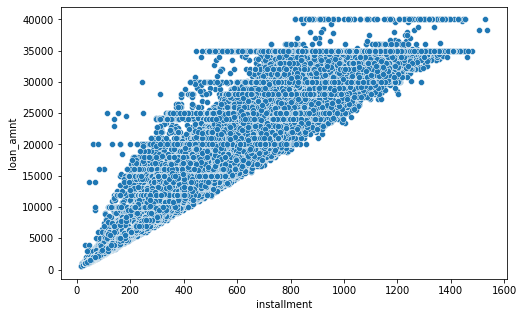

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**Boxplot between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

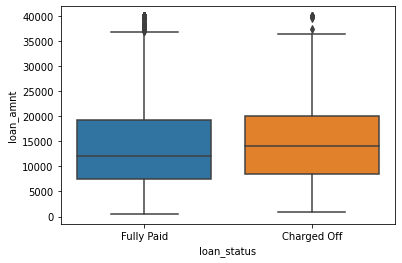

In [18]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

**Statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby(by='loan_status').describe().iloc[:, :10]

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             
                 75%      max     count       mean  
loan_status                                         
Charged Off  20000.0  40000.0   77673.0  15.882587  
Fully Paid   19225.0  40000.0  318357.0  13.092105

**Exploring grade and sub_grade feature**

In [20]:
feat_info('grade')

LC assigned loan grade


In [21]:
feat_info('sub_grade')

LC assigned loan subgrade


In [22]:
print('grade: ', sorted(df['grade'].unique()))
print('sub_grade: ', sorted(df['sub_grade'].unique()))

grade:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_grade:  ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

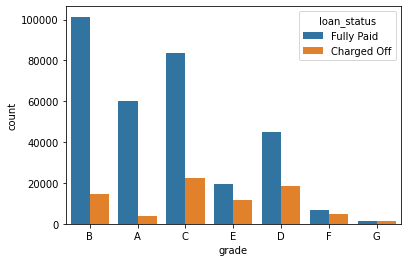

In [23]:
sns.countplot(x='grade', data=df, hue='loan_status')

**Count plot per subgrade, setting hue="loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

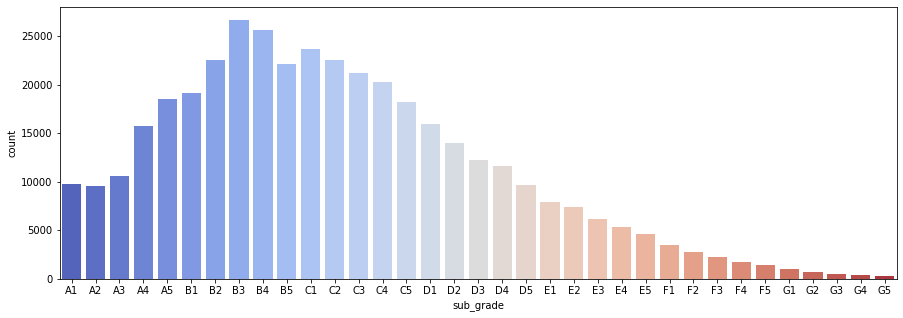

In [24]:
plt.figure(figsize=(15,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sub_grade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

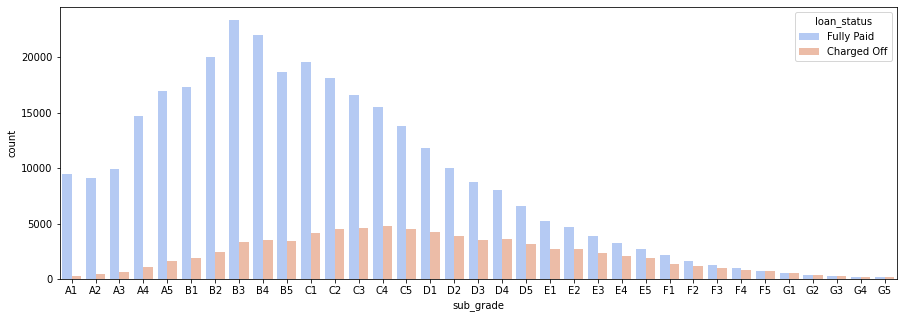

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sub_grade_order, palette='coolwarm')

**It looks like F and G subgrades don't get paid back that often. Isloating F and G subgrades and running countplot**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

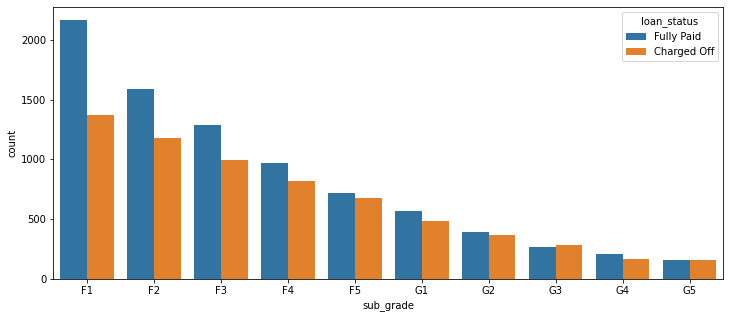

In [26]:
df_f_or_g = df[(df['grade']=='F') | (df['grade']=='G')]
fg_order = sorted(df_f_or_g['sub_grade'].unique())

plt.figure(figsize=(12,5))
sns.countplot(data=df_f_or_g, x='sub_grade', order=fg_order, hue='loan_status')

**Creating a new column called 'loan_repaid' with mapping { Fully Paid:1 , Charged Off:0 }**

In [27]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [28]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1 , 'Charged Off':0})

In [29]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Bar plot showing the correlation of the numeric features to the new loan_repaid column**

<AxesSubplot:>

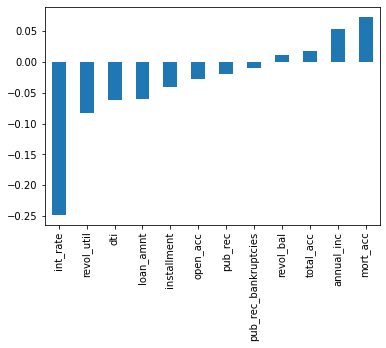

In [30]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

# Data PreProcessing

**Removing or/and filling any missing data, unnecessary or repetitive features. 
Converting categorical string features to dummy variables.**

In [31]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [32]:
len(df)

396030

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Handling emp_title and emp_length**

In [34]:
print('emp_title: ')
feat_info('emp_title')
print('emp_length: ')
feat_info('emp_length')

emp_title: 
The job title supplied by the Borrower when applying for the loan.*
emp_length: 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
print(df['emp_title'].nunique())

173105


In [36]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Since there are too many unique job titles to try to convert this to a dummy variable feature, we remove emp_title column.**

In [37]:
df = df.drop('emp_title', axis=1)

**Handling emp_length**

In [38]:
emp_length_order = sorted(df['emp_length'].dropna().unique())
emp_length_order

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

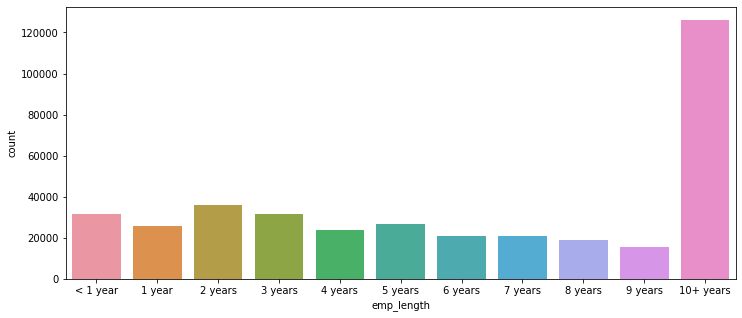

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length', order=emp_length_order, data = df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

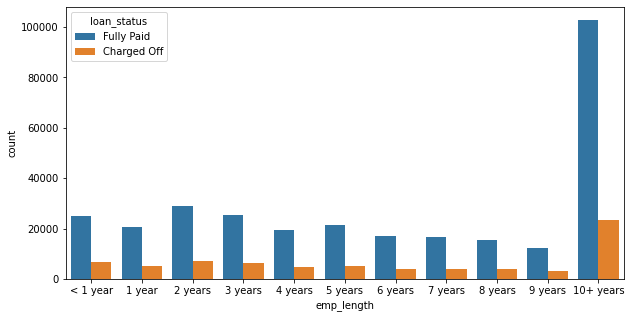

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off. So, we calculate the percentage of charge offs per category, thus understanding what percent of people per employment category didn't pay back their loan.**

In [42]:
df.groupby(by='emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,25882,25882,25882,25882,25882,25882,25882,25882,25882,25882,...,25882,25882,25860,25882,25882,25882,22858,25807,25882,25882
10+ years,126041,126041,126041,126041,126041,126041,126041,126041,126041,126041,...,126041,126041,125966,126041,126041,126041,117394,125951,126041,126041
2 years,35827,35827,35827,35827,35827,35827,35827,35827,35827,35827,...,35827,35827,35804,35827,35827,35827,31738,35764,35827,35827
3 years,31665,31665,31665,31665,31665,31665,31665,31665,31665,31665,...,31665,31665,31647,31665,31665,31665,27880,31616,31665,31665
4 years,23952,23952,23952,23952,23952,23952,23952,23952,23952,23952,...,23952,23952,23936,23952,23952,23952,20666,23919,23952,23952
5 years,26495,26495,26495,26495,26495,26495,26495,26495,26495,26495,...,26495,26495,26479,26495,26495,26495,23357,26471,26495,26495
6 years,20841,20841,20841,20841,20841,20841,20841,20841,20841,20841,...,20841,20841,20826,20841,20841,20841,18641,20818,20841,20841
7 years,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,...,20819,20819,20799,20819,20819,20819,19054,20803,20819,20819
8 years,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,...,19168,19168,19150,19168,19168,19168,17751,19149,19168,19168


In [43]:
total = df.groupby(by='emp_length').count()['loan_repaid']
charged_off = df.groupby(by='emp_length').sum()['loan_repaid']
(total-charged_off)/total*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_repaid, dtype: float64

In [44]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

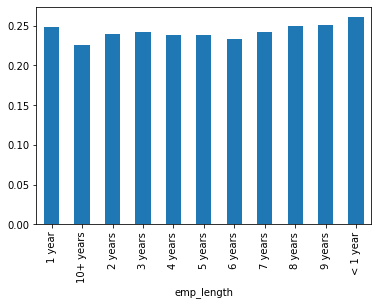

In [45]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths.So we drop the emp_length column.**

In [46]:
df.drop('emp_length', axis=1, inplace=True)

In [47]:
df.shape

(396030, 26)

In [48]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Handling title and purpose column**

In [49]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [50]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [51]:
df.drop('title', axis=1, inplace=True)

**Handling mort_acc feature**

In [52]:
feat_info('mort_acc')

Number of mortgage accounts.


In [53]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**Reviewing other columns to see which correlates the most to mort_acc**

In [54]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

<AxesSubplot:>

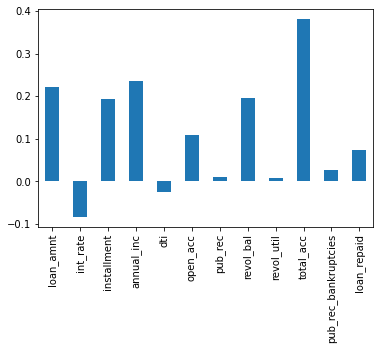

In [55]:
df.corr()['mort_acc'].drop('mort_acc').plot(kind='bar') #

**Since the total_acc feature correlates with the mort_acc, we will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry to get the result below:**

In [56]:
print('Mean of mort_acc column per total_acc')
df.groupby(by='total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Filling the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above**

In [57]:
df['mort_acc'].isna().sum()

37795

In [58]:
total_acc_avg = df.groupby(by='total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [59]:
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
        

In [60]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'], x['total_acc']), axis=1)

In [61]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we are removing the rows with missing values**

In [62]:
df = df.dropna()

In [63]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**Dealing with the string values of categorical columns.**

In [64]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type**

In [65]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [66]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [67]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [68]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**Since grade is part of sub_grade, we're dropping the grade feature.**

In [69]:
df.drop('grade', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**Converting the subgrade into dummy variables and then concatenating these new columns to the original dataframe**

In [70]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [71]:
df = df.drop('sub_grade', axis=1)
df = pd.concat([df, sub_grade_dummies], axis=1)

In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [73]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 

In [74]:
df[['purpose']].value_counts()

purpose           
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
dtype: int64

In [75]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status', 'application_type', 'initial_list_status','purpose'], axis=1)
df = pd.concat([df, dummies], axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [77]:
df.shape

(395219, 71)

### home_ownership

In [78]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables and concatenating, after replacing NONE and ANY with OTHER**

In [79]:
df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER', 'ANY':'OTHER'})
home_ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1), home_ownership_dummies], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [80]:
df.shape

(395219, 73)

### address
**Extracting zipcode to a zip code column from the address column in the data set. Dropping address and converting zipcode to dummy variables**

In [81]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [82]:
# df['zipcode'] = df['address'].apply(lambda x: x[-5:])
df['zipcode'] = df.apply(lambda x: x['address'][-5:], axis=1)

In [83]:
df['zipcode'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zipcode, dtype: object

In [84]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [85]:
zipcode_dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = pd.concat([df.drop(['address', 'zipcode'], axis=1), zipcode_dummies], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

In [86]:
df.shape

(395219, 81)

### issue_d 

**we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we're dropping this feature.**

In [87]:
feat_info('issue_d')

The month which the loan was funded


In [88]:
df = df.drop('issue_d', axis=1)

### earliest_cr_line
**Extracting the year from this feature using, converting it to a numeric feature and storing to new column named earliest_cr_year**

In [89]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [90]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [91]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [92]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df = df.drop('loan_status', axis=1)

In [95]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [96]:
df.shape

(395219, 79)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model with 78 --> 39 --> 19--> 1 no. of neurons. Adding dropout with keep_prob=0.2**

In [100]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [101]:
model.fit(x = X_train,
          y = y_train,
          epochs = 25,
          batch_size = 256,
          validation_data = (X_test, y_test),
         )

Epoch 1/25
1236/1236 [==============================] - 9s 5ms/step - loss: 0.3028 - val_loss: 0.2652
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2661 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2620 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2610 - val_loss: 0.2626
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2618
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2596 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2593 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

**Saving the model.**

In [102]:
from tensorflow.keras.models import load_model
model.save('Subhadeep_full_data_project_model.h5') 

# Evaluating Model Performance.

**Plotting validation loss versus the training loss.**

In [103]:
model_losses = pd.DataFrame(model.history.history)
model_losses.head()

,loss,val_loss
0,0.302821,0.265159
1,0.266119,0.262960
2,0.263294,0.262831
3,0.262029,0.262153
4,0.260970,0.262636


<AxesSubplot:>

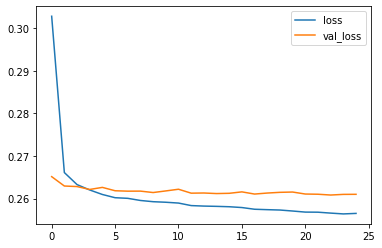

In [104]:
model_losses.plot()

**Predictions on X_test, creating classification report and confusion matrix.**

In [105]:
X_test.shape

(79044, 78)

In [106]:
predictions = model.predict(X_test)
predictions

array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.471295e-01],
       [9.999999e-01],
       [1.853043e-22]], dtype=float32)

In [107]:
predictions = np.where(predictions>=0.5, 1, 0)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [109]:
confusion_matrix(y_test, predictions)

array([[ 7080,  8578],
       [  298, 63088]], dtype=int64)

**Random testing on one sample**

In [110]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
print(new_customer)

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64


In [111]:
model.predict(new_customer.values.reshape(1,-1))

array([[1.]], dtype=float32)

In [112]:
print(df.loc[random_ind]['loan_repaid'])

1.0


**fin.**